In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## reading data

In [24]:
car_data = pd.read_csv('../data/raw/car_raw.csv', index_col=0)
print(car_data.shape)
car_data.head()

(2948, 11)


,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city,location_state
2310,Porsche Macan 3.6 Turbo,265000000,https://carro.mercadolibre.com.co/MCO-14019929...,2015,31171,2024-03-13,Porsche,Macan,1401992975,Usaquén,Bogotá D.C.
2311,Volkswagen Bora 2.5 Exclusive,33000000,https://carro.mercadolibre.com.co/MCO-22598732...,2009,153000,2024-03-13,Volkswagen,Bora,2259873206,Suba,Bogotá D.C.
2312,Ford Fiesta 1.6 Hatchback Mecánica,36000000,https://carro.mercadolibre.com.co/MCO-14020825...,2012,62142,2024-03-13,Ford,Fiesta,1402082557,Suba,Bogotá D.C.
2313,Renault Duster 2.0 Dynamique 4x4,73000000,https://carro.mercadolibre.com.co/MCO-14020174...,2021,23104,2024-03-13,Renault,Duster,1402017441,Usaquén,Bogotá D.C.
2314,Toyota Rav4 2.5,180890000,https://carro.mercadolibre.com.co/MCO-14020422...,2021,35200,2024-03-13,Toyota,Rav4,1402042245,Suba,Bogotá D.C.


In [92]:
## Indentify wrong data an fix it
car_data['price'] = car_data['price'].replace(3320000000, 320000000)
car_data['price'] = car_data['price'].replace(730000000, 71000000)

## Marca del vehiculo

<Axes: xlabel='vehicle_make'>

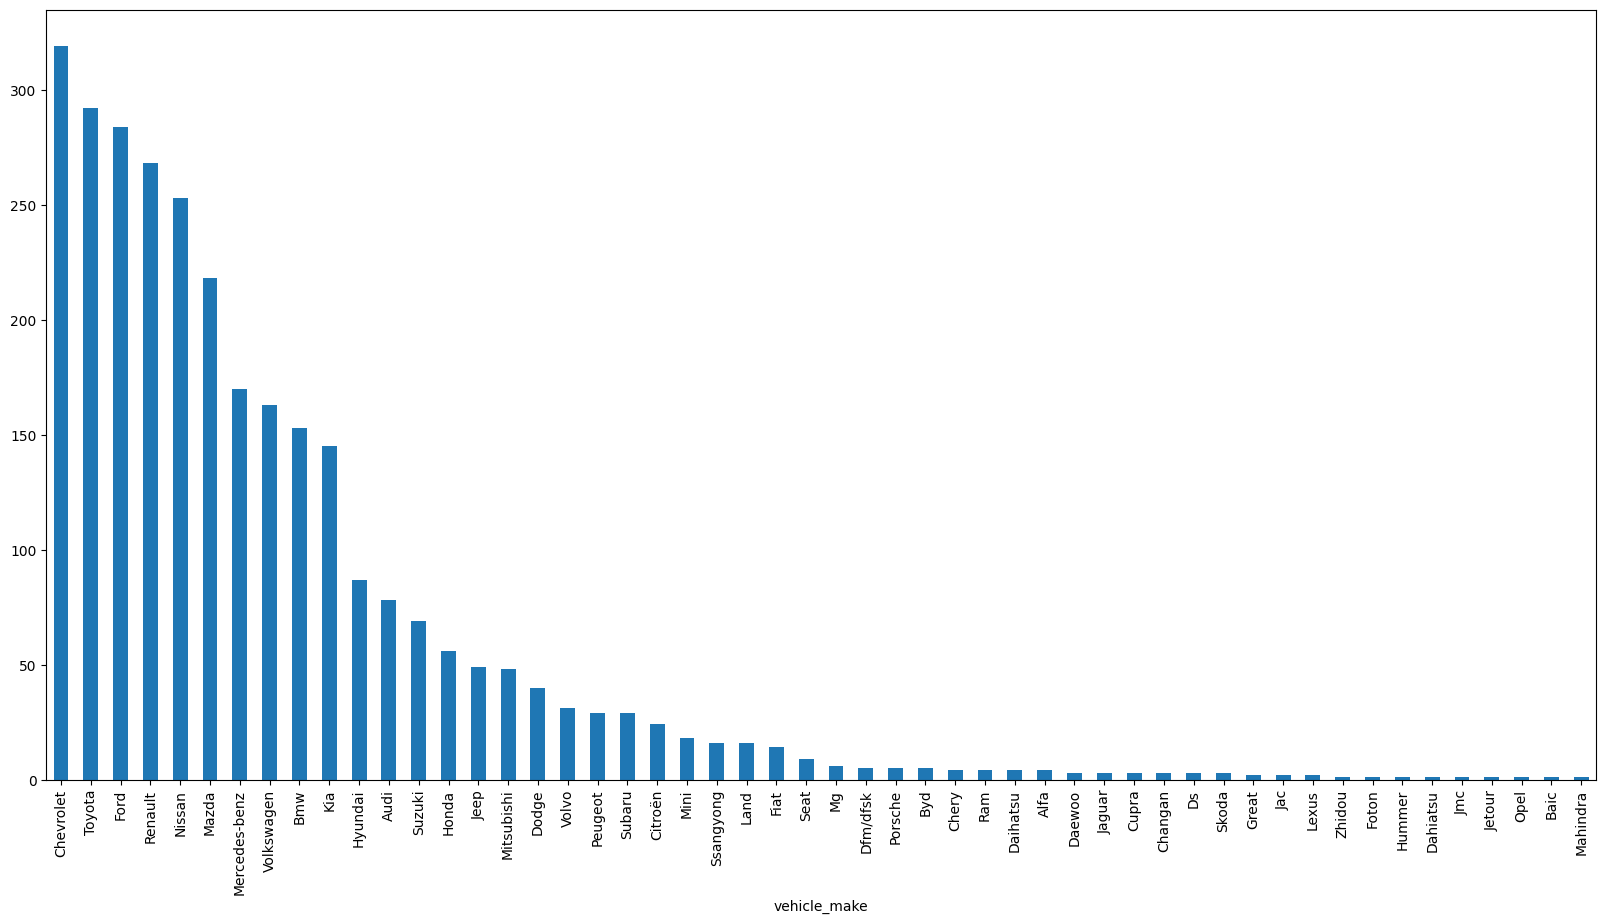

In [26]:
plt.figure(figsize=(20,10))
car_data['vehicle_make'].value_counts().plot(kind='bar')

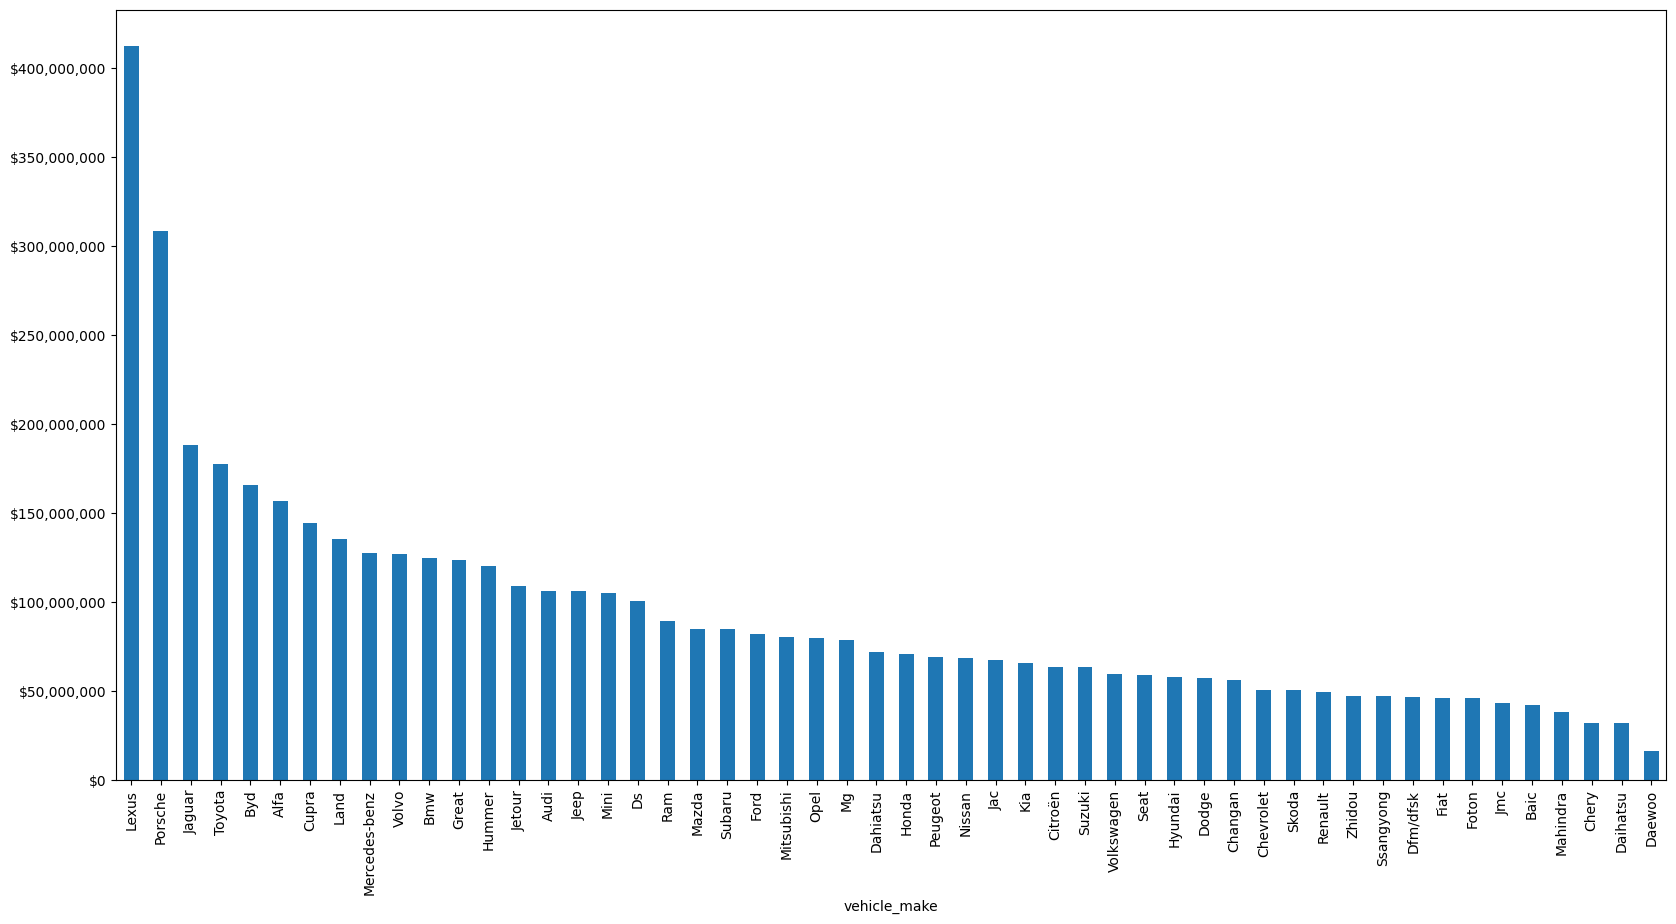

In [4]:


# Suponiendo que car_data es tu DataFrame y ya has agrupado y ordenado los datos como mencionaste
plt.figure(figsize=(20,10))
ax = car_data.groupby('vehicle_make')['price'].mean().sort_values(ascending=False).plot(kind='bar')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

## Modelo del vehiculo

<Axes: xlabel='years'>

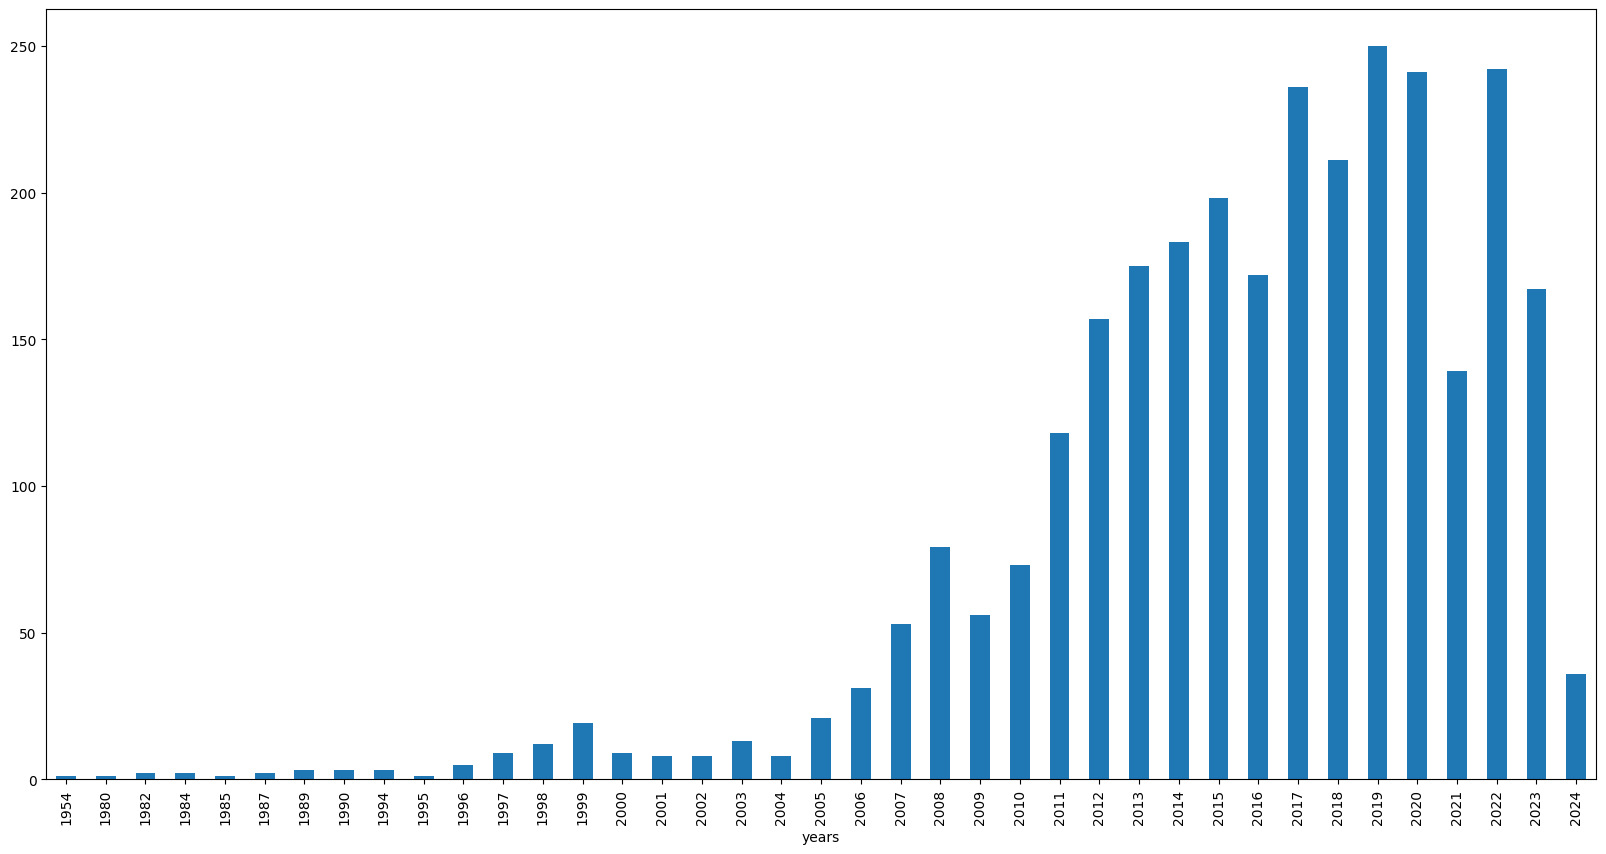

In [31]:
plt.figure(figsize=(20,10))
car_data['years'].value_counts().sort_index().plot(kind='bar')

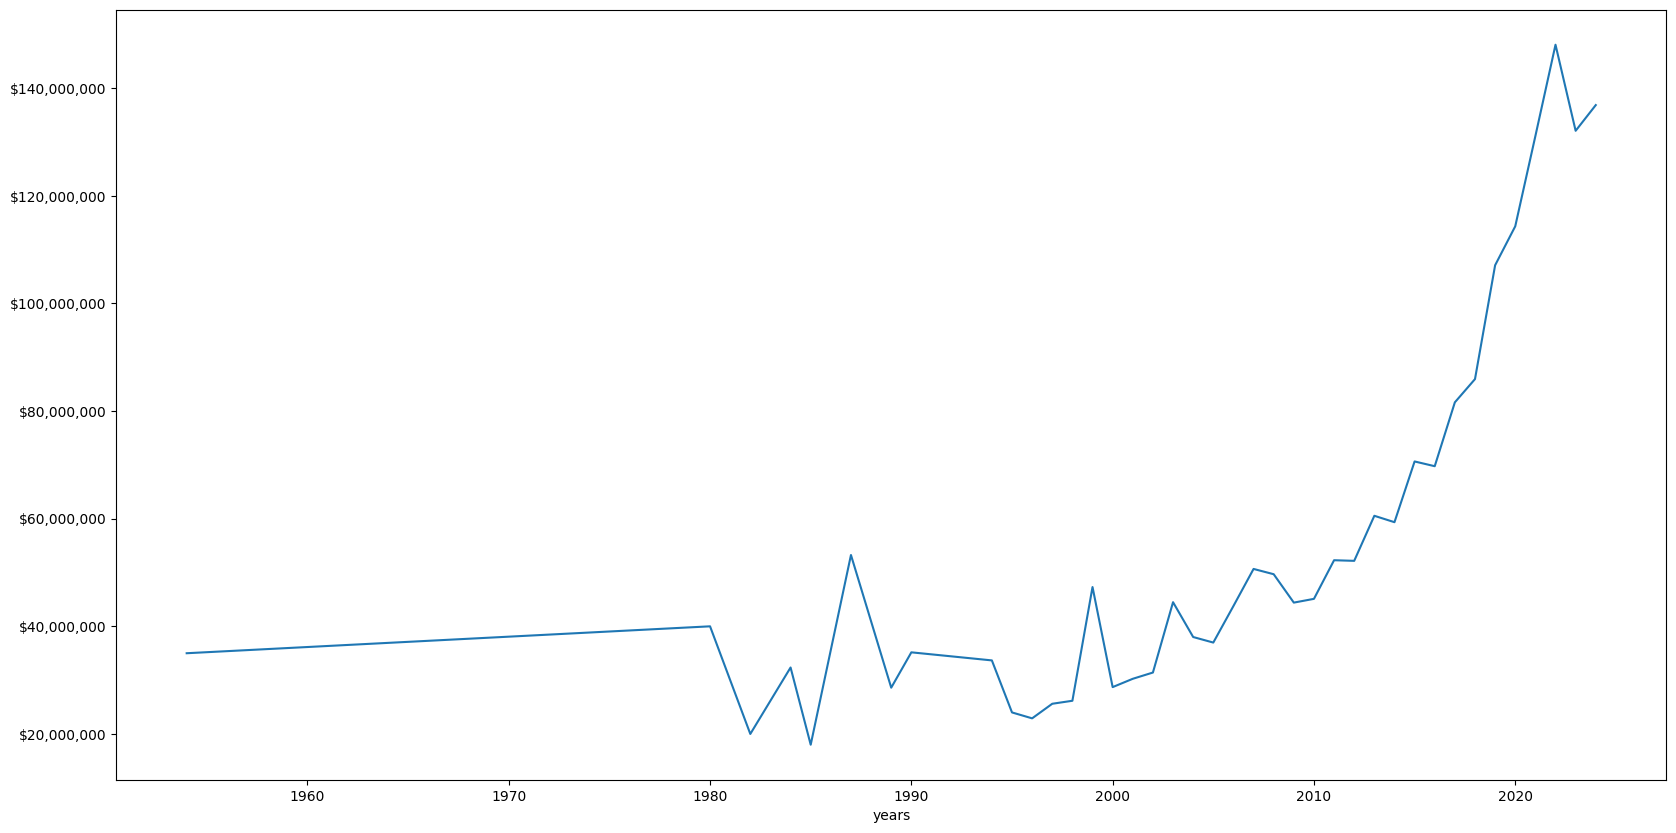

In [33]:
plt.figure(figsize=(20,10))
ax = car_data.groupby('years')['price'].mean().plot(kind='line')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

## Kilometraje

<Axes: >

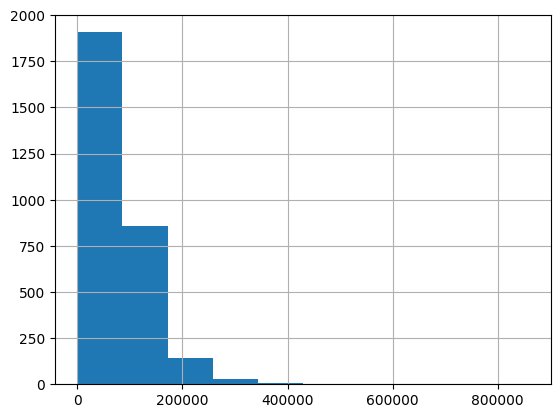

In [41]:
car_data['kilometraje'].hist()

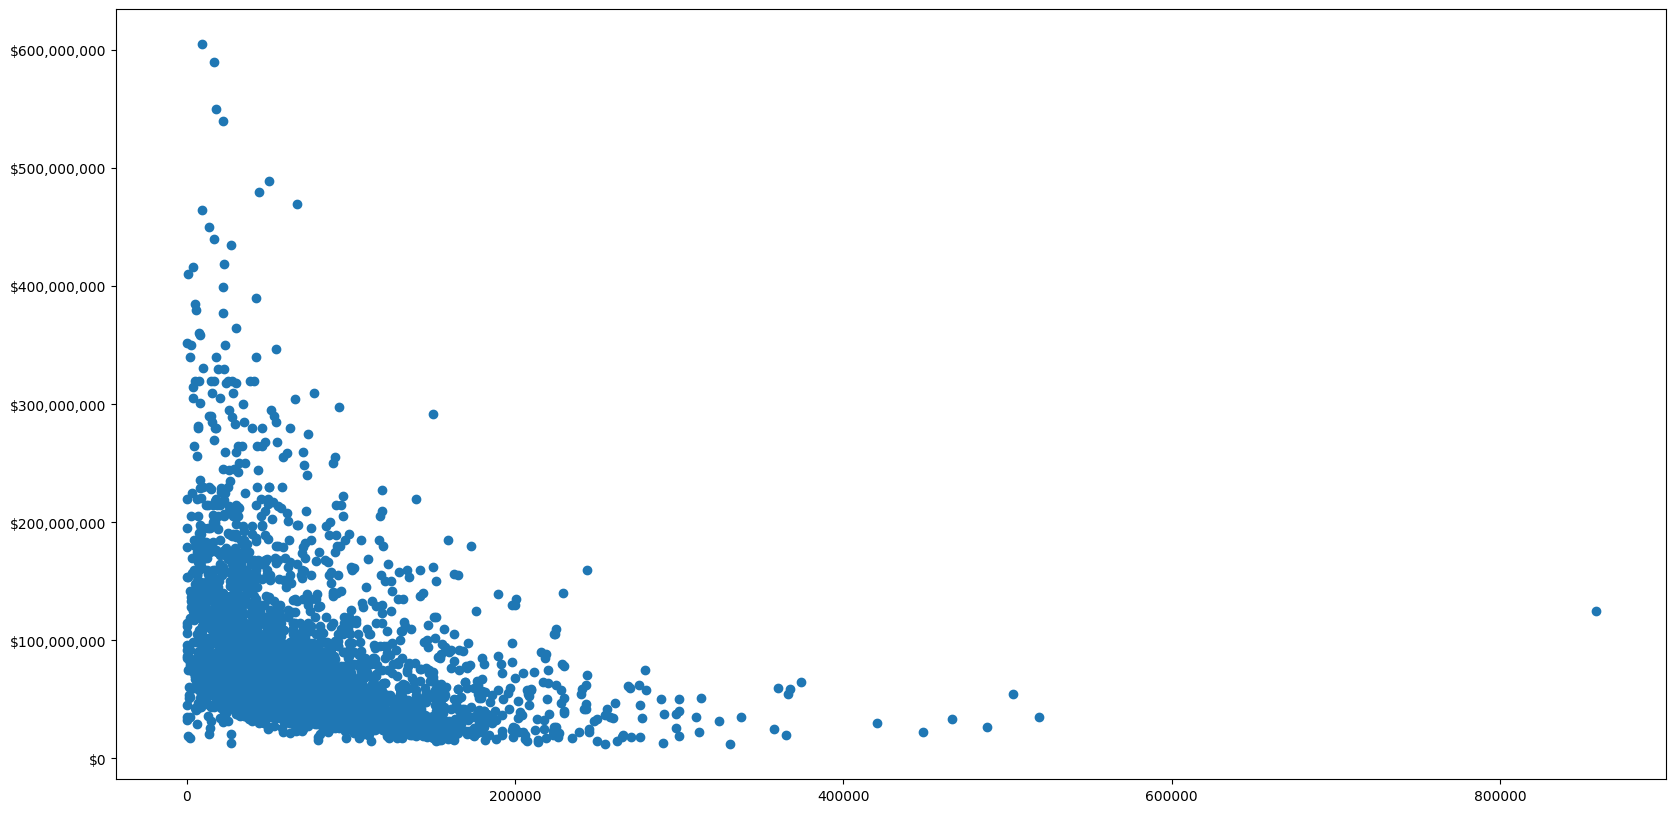

In [39]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(20,10))

# Crear el gráfico de dispersión usando el objeto de ejes
ax.scatter(x=car_data['kilometraje'], y=car_data['price'])

# Definir el formato para el eje y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

# Aplicar el formato al eje y
ax.yaxis.set_major_formatter(tick)

# Mostrar el gráfico
plt.show()

# Explorar alguna marca en especifico

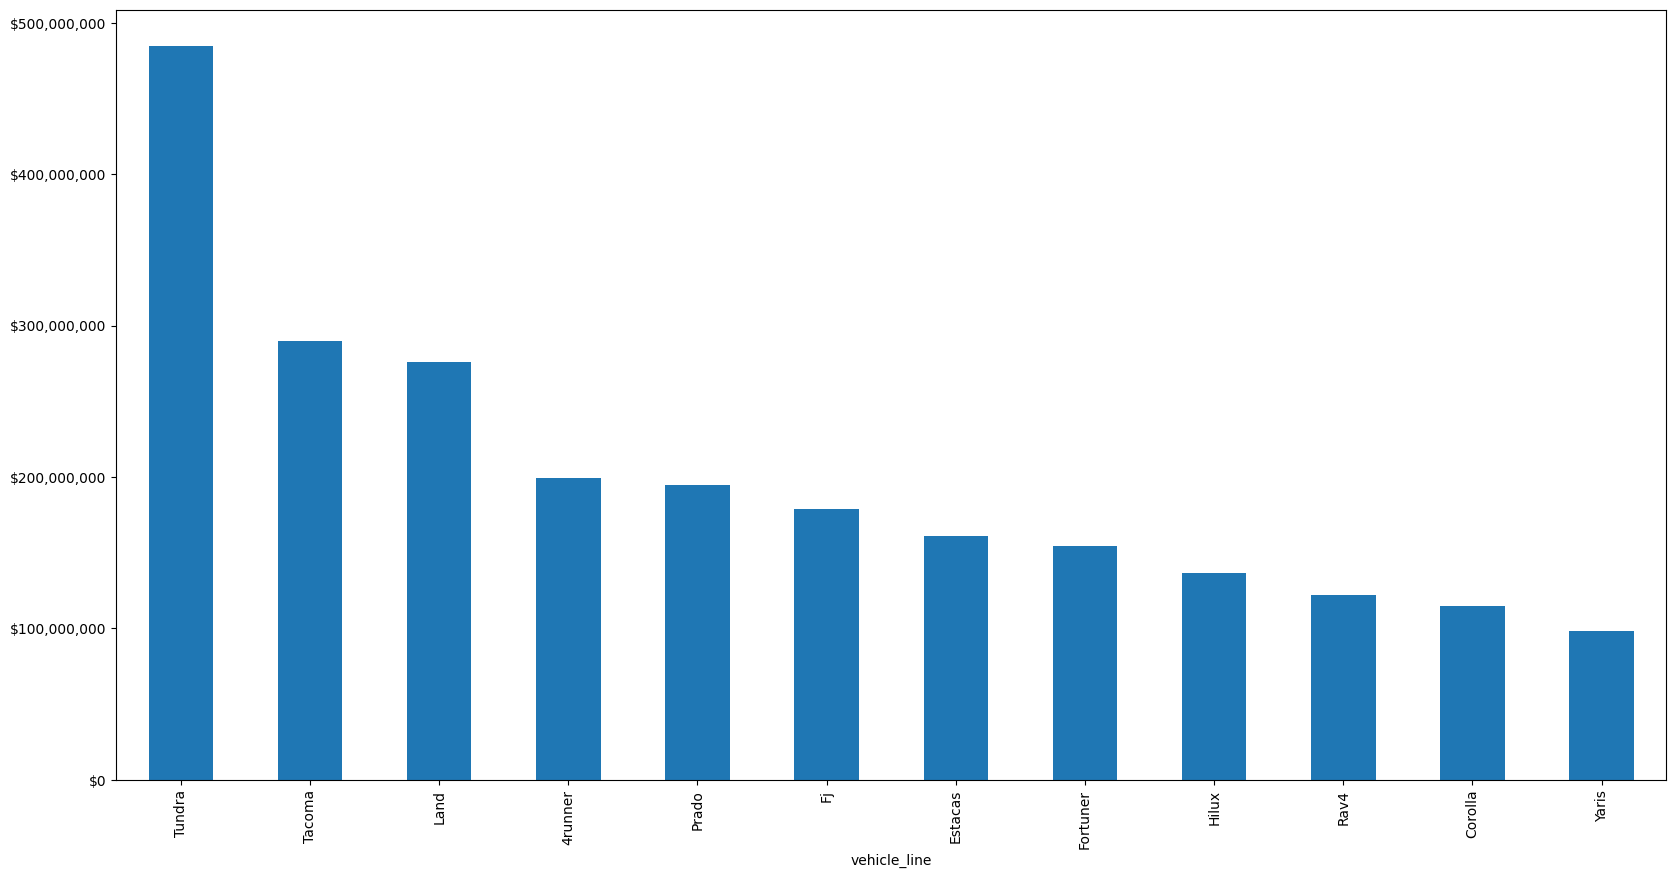

In [36]:
# Suponiendo que car_data es tu DataFrame y ya has agrupado y ordenado los datos como mencionaste
plt.figure(figsize=(20,10))
ax = car_data[car_data['vehicle_make']=='Toyota'].groupby('vehicle_line')['price'].mean().sort_values(ascending=False).plot(kind='bar')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

## Creando antiguedad a partir de año

<Axes: >

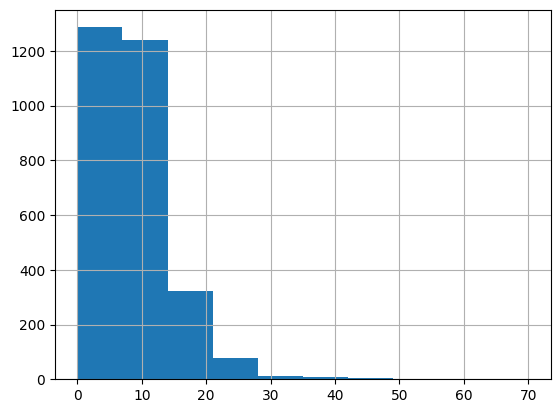

In [93]:
car_data['year_created' ] = car_data['_created'].apply(lambda x: x[:4]).astype(int)
car_data['antique'] = car_data['year_created'] - car_data['years']
car_data['antique'].hist()

# Select only usefull vars for modeling

In [94]:
final_vars = ['price', 'antique', 'vehicle_make', 'vehicle_line', 'kilometraje', 'location_city', 'location_state']
car_data = car_data[final_vars]

In [95]:
car_data

,price,antique,vehicle_make,vehicle_line,kilometraje,location_city,location_state
2310,265000000,9,Porsche,Macan,31171,Usaquén,Bogotá D.C.
2311,33000000,15,Volkswagen,Bora,153000,Suba,Bogotá D.C.
2312,36000000,12,Ford,Fiesta,62142,Suba,Bogotá D.C.
2313,73000000,3,Renault,Duster,23104,Usaquén,Bogotá D.C.
2314,180890000,3,Toyota,Rav4,35200,Suba,Bogotá D.C.
...,...,...,...,...,...,...,...
5843,59500000,3,Chevrolet,Onix,24000,Santa Fe,Bogotá D.C.
5844,65000000,6,Mazda,2,56000,Usaquén,Bogotá D.C.
5845,102000000,4,Mercedes-benz,A,45000,Usaquén,Bogotá D.C.
5846,63000000,5,Suzuki,Grand,105400,Usaquén,Bogotá D.C.


In [97]:
## Vars with na
vars_with_na = [var for var in car_data.columns if car_data[var].isnull().sum() > 0]

car_data[vars_with_na].isnull().mean()

Series([], dtype: float64)

In [99]:
# make list of numerical variables
num_vars = [var for var in car_data.columns if car_data[var].dtypes != 'O' and 'fraude' not in var]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
car_data[num_vars].head()

Number of numerical variables:  3


,price,antique,kilometraje
2310,265000000,9,31171
2311,33000000,15,153000
2312,36000000,12,62142
2313,73000000,3,23104
2314,180890000,3,35200


In [101]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    car_data[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  0


In [103]:
# capture categorical variables in a list
cat_vars = [var for var in car_data.columns if car_data[var].dtypes == 'O' and 'fecha' not in var]

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  4


In [106]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['price'].count() / len(df)


    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(car_data, var, 0.01))
    print()

vehicle_make
Alfa         0.001357
Baic         0.000339
Byd          0.001696
Changan      0.001018
Chery        0.001357
Citroën      0.008141
Cupra        0.001018
Daewoo       0.001018
Dahiatsu     0.000339
Daihatsu     0.001357
Dfm/dfsk     0.001696
Ds           0.001018
Fiat         0.004749
Foton        0.000339
Great        0.000678
Hummer       0.000339
Jac          0.000678
Jaguar       0.001018
Jetour       0.000339
Jmc          0.000339
Land         0.005427
Lexus        0.000678
Mahindra     0.000339
Mg           0.002035
Mini         0.006106
Opel         0.000339
Peugeot      0.009837
Porsche      0.001696
Ram          0.001357
Seat         0.003053
Skoda        0.001018
Ssangyong    0.005427
Subaru       0.009837
Zhidou       0.000339
Name: price, dtype: float64

vehicle_line
116       0.000339
120i      0.000339
128ti     0.000339
2008      0.001696
206       0.002035
            ...   
Yeti      0.000339
Yoya      0.000678
Yuan      0.000339
Zafira    0.000339
Zs     